In [102]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [103]:
#Array as images
list_of_lists = [[255, 223, 191],
                 [159, 127, 95],
                 [63, 31, 0]]

simple_array = np.array(list_of_lists, dtype='uint8')
simple_array

array([[255, 223, 191],
       [159, 127,  95],
       [ 63,  31,   0]], dtype=uint8)

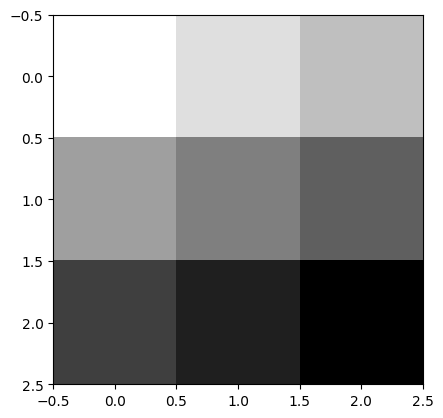

In [104]:
plt.imshow(simple_array, cmap='gray', vmin=0, vmax=255)
plt.show()

In [105]:
simple_array + 100

array([[ 99,  67,  35],
       [  3, 227, 195],
       [163, 131, 100]], dtype=uint8)

In [106]:
for i in range(simple_array.shape[0]):
  for j in range(simple_array.shape[1]):
    print(simple_array[i][j])

255
223
191
159
127
95
63
31
0


In [107]:
simple_array[2][2]

np.uint8(0)

In [108]:
simple_array[::-1,:]

array([[ 63,  31,   0],
       [159, 127,  95],
       [255, 223, 191]], dtype=uint8)

In [109]:
simple_array[:,::-1]

array([[191, 223, 255],
       [ 95, 127, 159],
       [  0,  31,  63]], dtype=uint8)

In [110]:
simple_array[:2,:2]

array([[255, 223],
       [159, 127]], dtype=uint8)

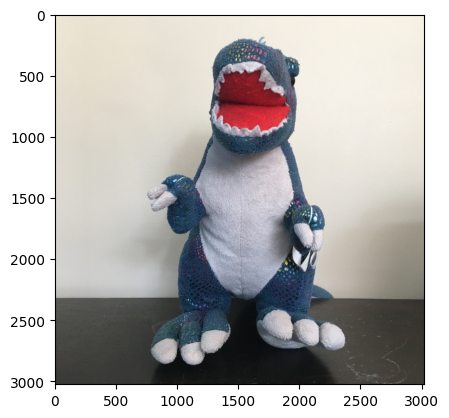

In [111]:
img = Image.open('/content/Peluche_Dino.jpg')
plt.imshow(img)
plt.show()

array([[230, 230, 229, ..., 241, 241, 240],
       [230, 230, 230, ..., 241, 240, 240],
       [230, 230, 230, ..., 241, 240, 240],
       ...,
       [ 57,  58,  59, ...,  60,  60,  60],
       [ 57,  58,  57, ...,  60,  60,  60],
       [ 56,  57,  56, ...,  60,  60,  59]], dtype=uint8)
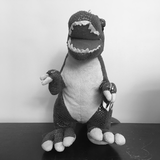

In [112]:
img_gray = img.convert('L') #Este step convierte la imagen a escala de grises
img_resized = img_gray.resize((160,160), Image.Resampling.LANCZOS)
img_array = np.array(img_resized)

img_array

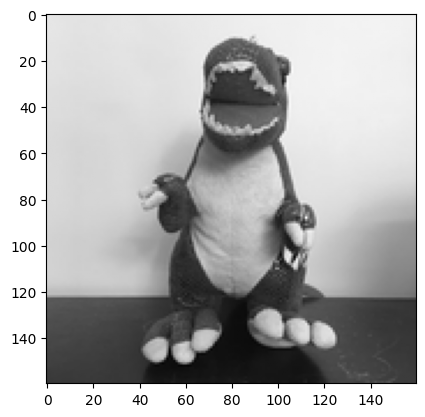

In [113]:
plt.imshow(img_array, cmap='gray')
plt.show()

In [114]:
fig = go.Figure(data=[go.Surface(z=img_array)])
fig.update_layout(title=dict(text="Dinosaur"), autosize=False, width=600, height=600, margin=dict(l=65, r=50, b=65, t=98))
fig.show()

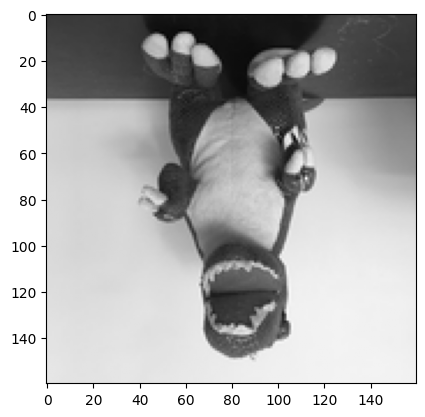

In [115]:
plt.imshow(img_array[::-1,:], cmap="gray")
plt.show()

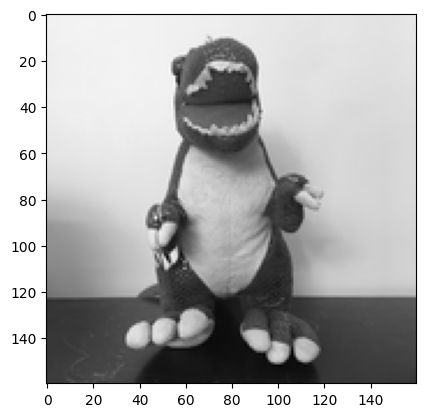

In [116]:
plt.imshow(img_array[:,::-1],cmap='gray')
plt.show()

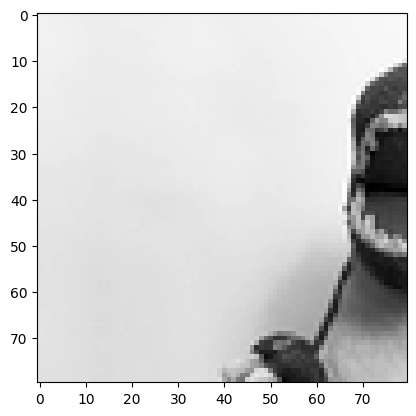

In [117]:
plt.imshow(img_array[:80,:80], cmap='gray')
plt.show()

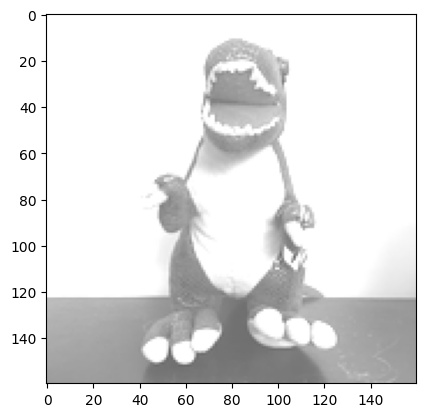

In [118]:
my_result = []
component = 100

for i in range(img_array.shape[0]):
  for j in range(img_array.shape[1]):
    if int(img_array[i][j]) + component > 255:
      my_result.append(255)
    else:
      my_result.append(int(img_array[i][j]) + component)

img_brighter = np.array(my_result, dtype='int16').reshape(160,160)

plt.imshow(img_brighter, cmap='gray', vmin=0, vmax=255)
plt.show()

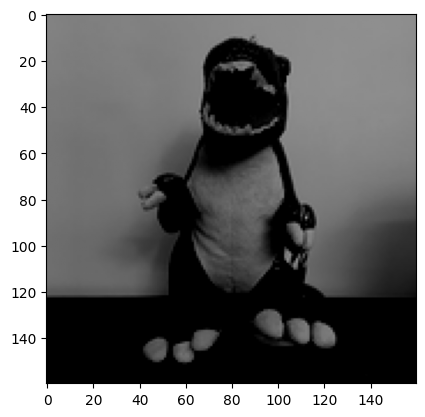

In [119]:
img_brighter = np.clip(img_array.astype('int16') - 100, a_min=0, a_max=255)
plt.imshow(img_brighter, cmap='gray', vmin=0, vmax=255)
plt.show()

Convolution: Es una multiplicacion de una matriz grande (una imagen) por una matriz pequeña llamada kernel

In [123]:
#Convolutions
def convolution_2d(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape
  output_height = image_height - kernel_height + 1
  output_width = image_width - kernel_width + 1
  output = np.zeros((output_height,output_height))

  for i in range(output_height):
    for j in range(output_width):
      image_patch = image[i:i+kernel_height, j:j + kernel_width]
      multiplied_elements = image_patch * kernel
      output[i,j] = np.sum(multiplied_elements)

  return output

In [124]:
img_array_16 = img_array.astype('int16')

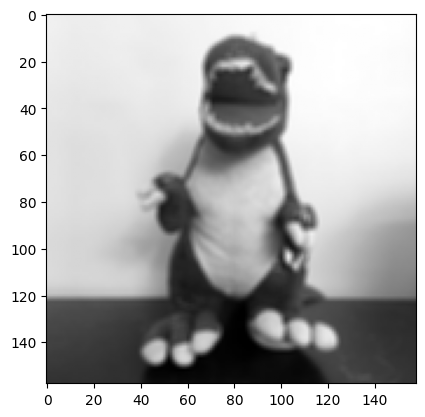

In [125]:
kernel = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]], dtype='int16') * (1/9)

plt.imshow(convolution_2d(img_array, kernel),cmap='gray')
plt.show()

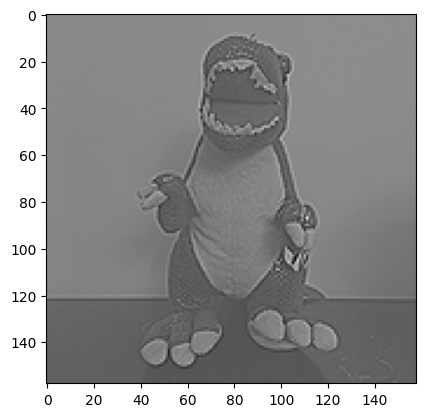

In [128]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], dtype='int16') * (1 / 9) # Sharpen filter

plt.imshow(convolution_2d(img_array_16, kernel), cmap='gray')
plt.show()

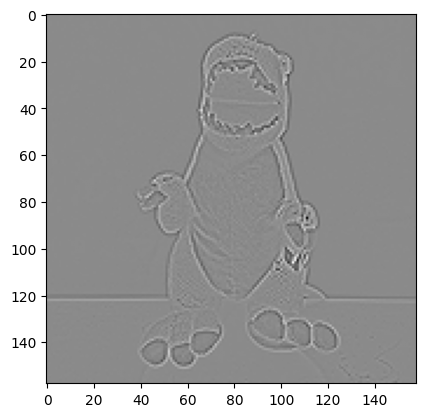

In [126]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]], dtype='int16') * (1/9) #Laplacian filter

plt.imshow(convolution_2d(img_array, kernel),cmap='gray')
plt.show()

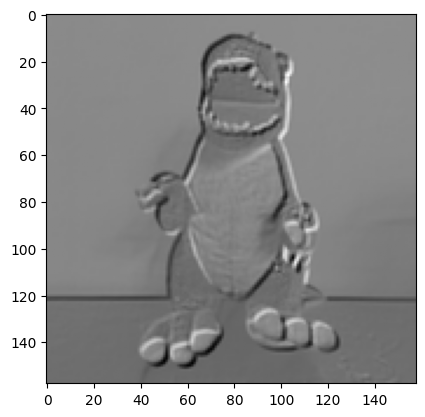

In [127]:
kernel = np.array([[-2,-1,0],
                   [-1,1,1],
                   [0,1,2]], dtype='int16') * (1/9) #Emboss filter

plt.imshow(convolution_2d(img_array, kernel),cmap='gray')
plt.show()